## Import Relevant Packages

In [4]:
!pip install numpy tqdm matplotlib spikeinterface spikeforest


zsh:1: command not found: pip


In [2]:
#Assorted useful python packages 
import os
import numpy as np 
import tqdm as notebook
import matplotlib.pyplot as plt
from pprint import pprint
import json 

import spikeinterface.full as si #all spikeinterface modules
import kachery_cloud as kcl #cloud host for spikeforest datasets
import spikeforest as sf #forked version of spikeforest

ModuleNotFoundError: No module named 'numpy'

## Import Recordings/Sortings

### Rat Hippocampus 2017 
#### (https://rdr.ucl.ac.uk/articles/dataset/Recording_with_a_Neuropixels_probe/25232962/2?file=44571814)

In [3]:

#Get path to rat data
current_dir = os.getcwd()
data_path = os.path.join(current_dir, '..', 'data', '2017_rat_hippocampus')
raw_binary_file = os.path.join(data_path, 'decompressed_files')

#Use spike extractors 
rat_hippocampus_recording = si.read_binary(raw_binary_file, 30000, dtype=np.int16, num_channels=384)
print(rat_hippocampus_recording)

BinaryRecordingExtractor: 384 channels - 30.0kHz - 1 segments - 113,503,582 samples 
                          3,783.45s (1.05 hours) - int16 dtype - 81.18 GiB
  file_paths: ['/gpfs/gibbs/project/bhattacharjee/mcg76/TempoSort/spike-interface-trials/../data/2017_rat_hippocampus/decompressed_files']


### Import All SpikeForest Datasets

#### Included in all_recordings/all_sortings:

##### paired_boyden_uri 
 - Description of dataset: https://spikeforest.flatironinstitute.org/studyset/PAIRED_BOYDEN
 - URI sha1://849e53560c9241c1206a82cfb8718880fc1c6038?paired-boyden-spikeforest-recordings.json
##### paired_kampff_uri 
 - Description of dataset: https://spikeforest.flatironinstitute.org/studyset/PAIRED_KAMPFF
 - URI sha1://b8b571d001f9a531040e79165e8f492d758ec5e0?paired-kampff-spikeforest-recordings.json
##### paired_english_uri  
 - Description of dataset: https://spikeforest.flatironinstitute.org/studyset/PAIRED_ENGLISH
 - URI sha1://dfb1fd134bfc209ece21fd5f8eefa992f49e8962?paired-english-spikeforest-recordings.json
##### paired_crcns_hc1
 - Description of dataset: https://spikeforest.flatironinstitute.org/studyset/PAIRED_CRCNS_HC1

##### paired_mea64c_yger
 - Description of datset: https://spikeforest.flatironinstitute.org/studyset/PAIRED_MEA64C_YGER

#### Possible to Extract

##### hybrid_janelia_uri 
 - Description of dataset: https://spikeforest.flatironinstitute.org/studyset/HYBRID_JANELIA
 - URI: sha1://43298d72b2d0860ae45fc9b0864137a976cb76e8?hybrid-janelia-spikeforest-recordings.json 
##### synth_monotrode_uri 
 - Description of dataset: https://spikeforest.flatironinstitute.org/studyset/SYNTH_MONOTRODE
 - URI: sha1://3b265eced5640c146d24a3d39719409cceccc45b?synth-monotrode-spikeforest-recordings.json


In [38]:

#Note that the order of loaded datasets is NOT the same
all_recordings = sf.load_spikeforest_recordings() #Load all recordings
all_sorting_outputs = sf.load_spikeforest_sorting_outputs() #Load all sortings

#Print details of every recording
for R in all_recordings:
        print('=========================================================')
        print(f'{R.study_set_name}/{R.study_name}/{R.recording_name}')
        print(f'Num. channels: {R.num_channels}')
        print(f'Duration (sec): {R.duration_sec}')
        print(f'Sampling frequency (Hz): {R.sampling_frequency}')
        print(f'Num. true units: {R.num_true_units}')
        print(f'Sorting true object: {json.dumps(R.sorting_true_object)}')
        print('')

#print deatils of every sorting
for X in all_sorting_outputs:
        print('=========================================================')
        print(f'{X.study_name}/{X.recording_name}/{X.sorter_name}')
        print(f'CPU time (sec): {X.cpu_time_sec}')
        print(f'Return code: {X.return_code}')
        print(f'Timed out: {X.timed_out}')
        print(f'Sorting true object: {json.dumps(X.sorting_object)}')
        print('')

PAIRED_BOYDEN/paired_boyden32c/1103_1_1
Num. channels: 32
Duration (sec): 387.11466666666666
Sampling frequency (Hz): 30000.0
Num. true units: 1
Sorting true object: {"firings": "sha1://149cf0f1ab2963132da818450a4adbf521457f43?label=firings_true.mda", "samplerate": 30000.0}

PAIRED_BOYDEN/paired_boyden32c/419_1_7
Num. channels: 32
Duration (sec): 494.46456666666666
Sampling frequency (Hz): 30000.0
Num. true units: 1
Sorting true object: {"firings": "sha1://a5b7de64d7a2a96c0e1af70cdb2d4ae927e4949d?label=firings_true.mda", "samplerate": 30000.0}

PAIRED_BOYDEN/paired_boyden32c/419_1_8
Num. channels: 32
Duration (sec): 490.3003
Sampling frequency (Hz): 30000.0
Num. true units: 1
Sorting true object: {"firings": "sha1://dd08a80f94e55d8653eb775e55aec40c34d50617?label=firings_true.mda", "samplerate": 30000.0}

PAIRED_BOYDEN/paired_boyden32c/509_1_1
Num. channels: 32
Duration (sec): 486.6634666666667
Sampling frequency (Hz): 30000.0
Num. true units: 1
Sorting true object: {"firings": "sha1://

## Compare Mountainsort 5 to Ground-Truth

In [39]:
#Choose dataset
first_boyden_recording_sf = sf.load_spikeforest_recording(study_name='paired_boyden32c', recording_name='1103_1_1', uri='sha1://849e53560c9241c1206a82cfb8718880fc1c6038?paired-boyden-spikeforest-recordings.json')
first_boyden_sorting_sf = sf.load_spikeforest_sorting_output(study_name='paired_boyden32c', recording_name='1103_1_1', sorter_name='JRClust')

#Convert dataset to spikeinterface format
first_boyden_recording = first_boyden_recording_sf.get_recording_extractor()
first_boyden_sorting = first_boyden_sorting_sf.get_sorting_extractor()

print(f'{first_boyden_recording_sf.study_set_name}/{first_boyden_recording_sf.study_name}/{first_boyden_recording_sf.recording_name}')
print(f'{first_boyden_sorting_sf.study_name}/{first_boyden_sorting_sf.recording_name}/{first_boyden_sorting_sf.sorter_name}')

PAIRED_BOYDEN/paired_boyden32c/1103_1_1
paired_boyden32c/1103_1_1/JRClust


In [43]:
##Set output folder
output_folder_MS = os.path.join(current_dir, 'folder_MS_5')

#Run MountainSort5
test_sorting = si.run_sorter(sorter_name='mountainsort5', recording=first_boyden_recording, remove_existing_folder=True, output_folder=output_folder_MS)

#Compare Moutainsort5 to GroundTruth
GTComp = si.GroundTruthComparison(gt_sorting=first_boyden_sorting, tested_sorting=test_sorting)

write_binary_recording with n_jobs = 1 and chunk_size = 30000
Using training recording of duration 300 sec with the sampling mode uniform
*** MS5 Elapsed time for SCHEME2 get_sampled_recording_for_training: 0.859 seconds ***
Running phase 1 sorting
Number of channels: 32
Number of timepoints: 9000000
Sampling frequency: 30000.0 Hz
Channel 0: [  0. 154.]
Channel 1: [  0. 165.]
Channel 2: [ 11. 165.]
Channel 3: [  0. 176.]
Channel 4: [ 11. 176.]
Channel 5: [  0. 187.]
Channel 6: [ 11. 187.]
Channel 7: [  0. 198.]
Channel 8: [ 11. 198.]
Channel 9: [  0. 209.]
Channel 10: [ 11. 209.]
Channel 11: [  0. 220.]
Channel 12: [ 11. 220.]
Channel 13: [  0. 231.]
Channel 14: [ 11. 231.]
Channel 15: [  0. 242.]
Channel 16: [ 11. 242.]
Channel 17: [  0. 253.]
Channel 18: [ 11. 253.]
Channel 19: [  0. 264.]
Channel 20: [ 11. 264.]
Channel 21: [  0. 275.]
Channel 22: [ 11. 275.]
Channel 23: [  0. 286.]
Channel 24: [ 11. 286.]
Channel 25: [  0. 297.]
Channel 26: [ 11. 297.]
Channel 27: [  0. 308.]
Chann

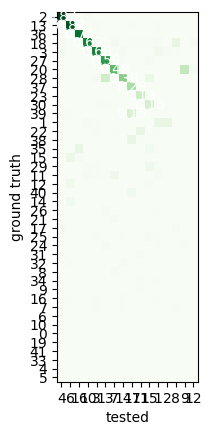

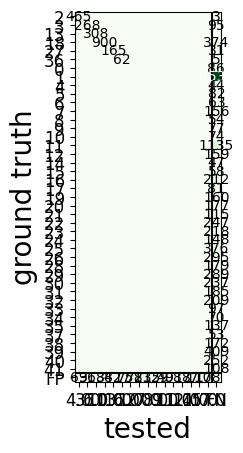

In [45]:
#Display Agreement Matrix
si.plot_agreement_matrix(GTComp)

#Display Confusion Matrix
si.plot_confusion_matrix(GTComp)

